In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Método de bisección

Este método de busqueda por bisección es utilizado para encontrar raíces de una
función continua de variable real. La única condición es que la función cambie de
signo en el intervalo en que buscamos. La existencia de la raíz de la función está
garantizada de acuerdo al teorema de Bolzano:

> <b>Teorema de Bolzano </b>: 
Si $f : [a, b] \to \mathbb{R}$, es una función continua en $[a, b]$ y $f(a)f(b) < 0$, entonces
existe $x_0 \in  [a, b]$ tal que $f(x_0) = 0$.

El método consiste en bisecar el intervalo $[a, b]$, estudiar los signos de $f$ en los
extremos de los nuevos intervalos de manera que podamos afirmar la existencia de
una raíz en un intervalo más pequeño como consecuencia del teorema de Bolzano.

## Algoritmo

Datos de entrada: $a, b,$ función, tolerancia.

calcular $x_0 =\dfrac{a+b}{2}$

Para $i = 0,1,2, ...$ 

* Si $f(a)f(x_i) < 0$, entonces $b = x_i$
* Si $f(a)f(x_i) > 0$, entonces $a = x_i$
* Si $f(a)f(x_i) = 0$, entonces $x_{i+1} = x_{i}$

Hasta que $ |x_{i+1}-x_{i}|< tolerancia $

In [5]:
def bisec(a,b,f,tol):
    xi = (a + b) / 2
    tynxt = 0
    while(abs(tynxt-xi)>=tol):
        if(f(a)*f(xi) < 0):
            b = xi
        elif(f(a)*f(xi) > 0):
            a = xi 
        if(f(a)*f(xi) != 0):
            tynxt = xi
            xi = (a + b) / 2
        else:
            tynxt = xi
    return xi

# Ejemplo 1

La función $f(x) = 10x^3-2x^2+1-e^{2x} $ tiene una raíz en el intervalo $[-0,5; 1]$. Estimar la raíz utilizando el método de la bisección.

In [11]:
def f(x):return (10*x**3)-(2*x**2)+1-np.exp(2*x)
print("[-0.5,1]->",bisec(-0.5,1,f,10e-6))

[-0.5,1]-> 0.8179073333740234


# Ejemplo 2

La ecuación $3 \ln(x) = x$ tiene dos soluciones en los intervalos $[1,5; 2,5]$ y $[4; 5]$.
Utilice el método de la bisección (con tolerancia a elección) para estimar las
soluciones de la ecuación.

In [12]:
def f(x): return 3*np.log(x)-x
tol = 10e-6
x = bisec(1.5,2.5, f, tol)
y = bisec(4,5,f, tol)
print("[1.5,2.5]->",x,"\n[4,5]->",y)

[1.5,2.5]-> 1.8571853637695312 
[4,5]-> 4.536399841308594


# Ejemplo 3 (el miserable)

La función $h(x) = \dfrac{1}{1-x} - e^x$ tiene una raíz en el intervalo [-0,5; 1]. Utilice
el algoritmo de Python para estimar la raíz (y vea que pasa).


In [52]:
def f(x):return (1/(1-x))-np.exp(x)
bolz = f(-0.4) * f(0.99)
tol = 10e-6
bisec(-0.5,1,f,tol)
bolz # No se cumple el teorema de bolzano al f(a) * f(b) > 0

4.27824490301302

# Ejemplo 4

Encontrar utilizando el método de bisección una aproximación de $\sqrt[3]{7}$.

In [53]:
def f(x):return (x**3)-7
tol = 10e-6
bisec(1,2,f,tol)

1.9129257202148438

# Newtwon Raphson

Este método es uno de los más populares para encontrar los ceros de una función, pero
requiere del conocimiento de su derivada. La regla principal del algoritmo consiste
en que, dado un punto $x_k$ cercano a la raíz de $f$, se determina la recta tangente a $f$
en $(x_k, f(x_k))$: <br>

$$y = f(x_k) + f'(x_k)(x - x_k)$$

Luego, se define la iteración siguiente $x_{k+1}$ como el punto de intersección entre esa
recta y el eje $x$, es decir, $x_{k+1}$ se obtiene al despejar

$$0 = f(x_k) + f(x_k)(x_{k+1} - x_k)$$

esto es
$$ x_{k+1} = x_k - \dfrac{f(x_k)}{f'(x_k)}  $$ 

## Algoritmo

Datos de entrada: $x_0, f , tolerancia$

Para $k = 0, 1, 2, ... $

* calcular $x_{k+1} = x_k - \dfrac{f(x_k)}{f'(x_k)} $

Hasta que $ | x_{k+1} - x_k | < tolerancia $

# Ejemplo 5

Encontrar una aproximación de las raíces de la función $f(x) = x^4-2$ con una tolerancia de $0,000001$. Graficar la curva asociada al gráfico de $f$ junto con sus iteraciones.


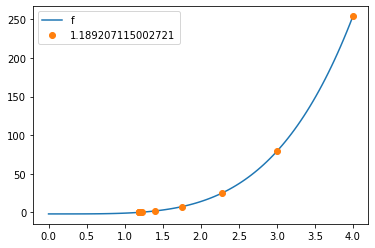

In [7]:

def newtonIters(x0,f,df,tol):
    X = [4]
    xk = X[-1]
    while True:
        xk = xk - f(xk)/df(xk)
        X.append(xk)
        if np.abs(X[-1]-X[-2])<tol:
            return X
def newton(x0,f,df,tol):
    x0 = x0 - (f(x0)/df(x0))
    nxt = 0
    while(abs(x0 - nxt) >= tol):
        nxt = x0
        x0 = x0 - (f(x0)/df(x0))
    return x0
def f(x): return (x**4) - 2
def df(x): return (4*x**3)
tol = 0.000001
X = np.array(newtonIters(1,f,df,tol)) # para las iteraciones
x = np.linspace(0,4,100) # para la funcion
plt.plot(x,f(x),label="f")
plt.plot(X,f(X),'o',label=newton(1,f,df,tol))
plt.legend()


# Ejercicios

* Encontrar una aproximación de el (los) punto(s) de intersección de las curvas $y=e^x$ e $y=x^2$, utilizando el método de Newton-Raphson.

* Encontrar una aproximación de la raíz de la función $h(x) = e^x + 2$ cercana a $x0 = 2$ con una tolerancia de $0,01.$

* Encontrar una aproximación de $\sqrt{3}$.

In [8]:
def f(x): return np.exp(x) - x**2 # y = e^x - x^2
def df(x): return np.exp(x) - 2*x
tol = 10e-6
newton(0,f,df,tol)

-0.7034674224983924

In [9]:
def h(x): return np.exp(x) + 2 # h = e^x + 2
def dh(x): return np.exp(x)
tol = 0.01
print(h(-10000)*h(10),"Es mayor que 0, no se cumple el teorema de Bolzano, por lo tanto no hay raices")
# es natural que te arroje error, pues la función es estrictamente positiva, es decir,
# realmente no tiene raíces, por tanto cualquier método visto fallará.
# Ese problema está hecho así para notar que antes de implementar cualquier método
# es necesario verificar las hipótesis, por ejemplo, verificando si existe alguna raíz 
# vía teorema de Bolzano.

44056.931589613436 Es mayor que 0, no se cumple el teorema de Bolzano, por lo tanto no hay raices


In [10]:
def g(x): return x**2-3
def dg(x): return 2*x
tol = 10e-6
newton(1,g,dg,tol)

1.7320508075688772